The purpose of this notebook is to build a model (Deep Neural Network) with Tensorflow. Below are the differents steps to do that. This notebook is split in several parts:

    I. Loading Libraries
    II. Reading data
    III. Preprocessing and feature study using Statistical Methods
    IV. Feature Engineering
    V. Data Split and Manipulation
    VI. Model Building
    VII. Training on complete data
    VIII. Predictions 
    IX.Conclusion
    
 The Goal
    Each row in the dataset describes the characteristics whichhave an influence on the y- value.
    Our goal is to predict the y value, given these features.
 


## Loading Libraries

In [81]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Neural Network
import tensorflow as tf

In [3]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## Reading data

#### The intern_data.csv file is used for performing training and validation tasks in the model. 

In [4]:
data_train= pd.read_csv('intern_data.csv')
data_test= pd.read_csv('intern_test.csv')
print("Dataset shape:",'data_train', data_train.shape, 'data_test', data_test.shape)

Dataset shape: data_train (500, 10) data_test (4500, 9)


#### The first column in the data set has no relevance to predicting the value of y.

In [5]:
#Collecting ID's from data sets
train_ID = data_train[data_train.columns[0]]
test_ID = data_test[data_test.columns[0]]

## Feature Study

### Missing Data

In [6]:
# Handle missing values
data_train.describe(include= 'all')

,Unnamed: 0,a,b,c,d,e,f,g,h,y
count,500.000000,500.000000,500.000000,500,500.000000,500.000000,500.000000,500.000000,500,500.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,yellow,NaN,NaN,NaN,NaN,white,NaN
freq,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN,392,NaN
mean,2442.692000,0.497413,0.505397,NaN,0.501722,0.501899,0.526562,0.508442,NaN,2.682803
std,1416.963518,0.292947,0.292450,NaN,0.284623,0.272019,0.292175,0.284332,NaN,0.592533
min,7.000000,0.002801,0.000369,NaN,0.000592,0.002387,0.001327,0.005644,NaN,0.981376
25%,1177.250000,0.253897,0.256446,NaN,0.252244,0.270069,0.262523,0.263525,NaN,2.300795
50%,2390.500000,0.510420,0.514069,NaN,0.496800,0.515185,0.506412,0.526403,NaN,2.726900
75%,3701.250000,0.760192,0.766578,NaN,0.735650,0.732240,0.790898,0.742125,NaN,3.155562


#### - The descripting of the data set above points out that no feature has missing values. All columns have a count of 500, which is the number of obbservations observed in the data set.
#### - Columns 'c' and 'h' are categorical in nature, whereas all other variables are continuous.
#### - All columns appear to be in standardized form. 
#### - All columns lie between the 0 to 1 range and appear to be normalized.

#### To statistically determine every columns dependance on the 'y' variable, correlation between all is plotted below in the form of a horizontal bar chart. The most correlated features to 'y' are: 
#### 1. 'e'
#### 2. 'g'
#### 3. 'f'
#### 4. 'b'
#### 5. 'a'
#### 6. 'd'

#### 'd' appears to be negatively correlated to the 'y' variable

### Correlations

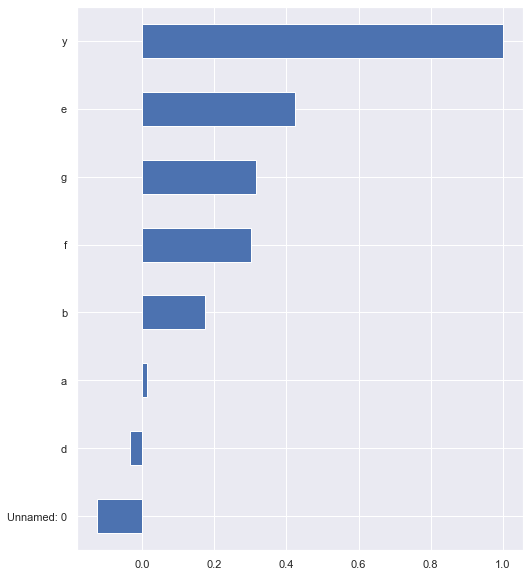

In [84]:
#y correlation with all the feature
plt.figure(figsize=(8, 10))
data_train.corr()['y'].sort_values().plot(kind='barh')

#### - To see a correlation between all features and the dependent varaible, a heat map with correlation as the character is used below. 
#### - The first column identifies,in order, the most to least correlated features to 'y'. 
#### - The theory about 'e' being the most correlated feature with 'y' can be confirmed from this plot.
#### - No multicollinearity can be observed between the different  features.

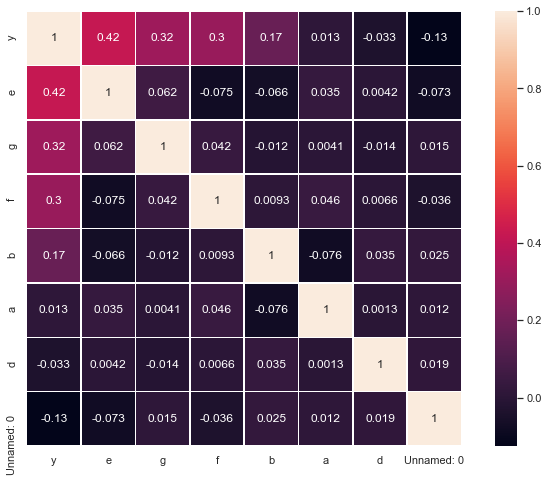

In [85]:
corr_= data_train.corr()
cols= corr_.sort_values(by= 'y', ascending=False)['y'].index  #finding the most highly correlated columns with 'y' 
                                                              #could have used nlargest with correlation too 
k = 10
k_corr_matrix = data_train[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(k_corr_matrix, xticklabels= k_corr_matrix.columns.values,yticklabels= k_corr_matrix.columns.values,annot=True,square= True,linewidths=.5)
b, t = plt.ylim() # the top level and bottom level values 
b += 0.5 # Adding 0.5 to the bottom
t -= 0.5 # Subtracting 0.5 from the top
plt.ylim(b, t) #updating the ylim(bottom, top) values to incorporate new changes
plt.show()

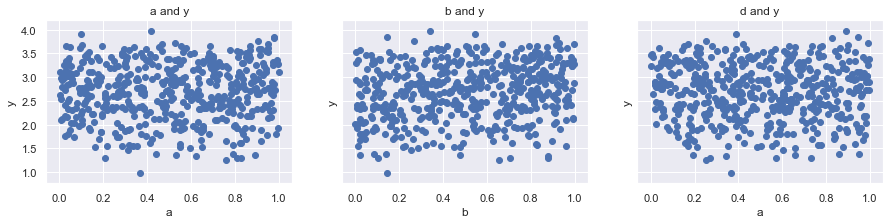

In [90]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_train['a'],data_train['y'])
ax1.set_title('a and y')
ax1.set(ylabel="y")
ax1.set(xlabel="a")
ax2.scatter(data_train['b'],data_train['y'])
ax2.set(ylabel="y")
ax2.set(xlabel="b")
ax2.set_title('b and y')
ax3.scatter(data_train['d'],data_train['y'])
ax3.set(ylabel="y")
ax3.set(xlabel="a")
ax3.set_title('d and y')
plt.show()

#### No linear relationship can be identified between the 'y' valriable with all other features of the data-set. 

Text(0.5, 1.0, 'g and y')

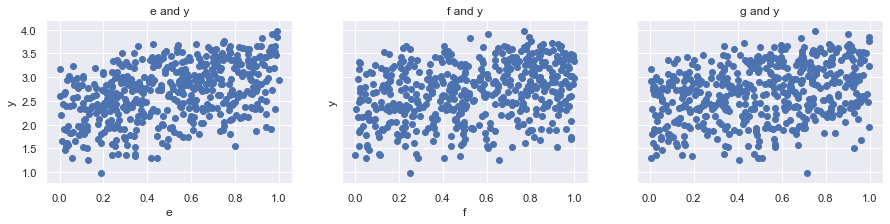

In [91]:
f, (ax4, ax5, ax6) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax4.scatter(data_train['e'],data_train['y'])
ax4.set(ylabel="y")
ax4.set(xlabel="e")
ax4.set_title('e and y')
ax5.scatter(data_train['f'],data_train['y'])
ax5.set(ylabel="y")
ax5.set(xlabel="f")
ax5.set_title('f and y')
ax6.scatter(data_train['g'],data_train['y'])
ax1.set(ylabel="y")
ax1.set(xlabel="g")
ax6.set_title('g and y')

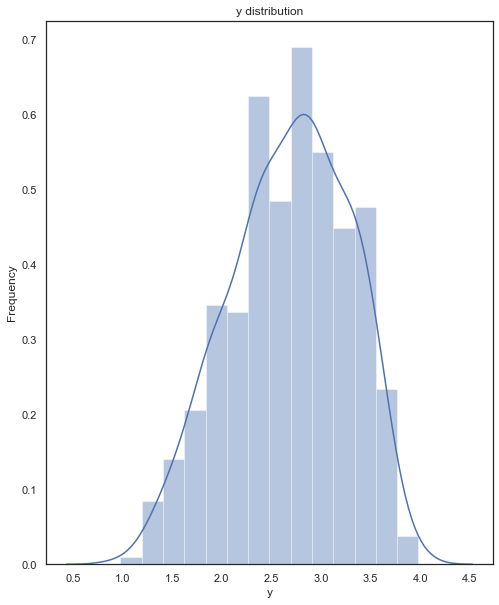

In [94]:
#Checking the distribution of the dependant variable
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 10))
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="y")
ax.set(title="y distribution")
normalized_y = data_train['y']
# helpful_normalized.describe()
sns.distplot(normalized_y, color= 'b')

In [12]:
#skewness and kurtosis
print("Skewness: " + str(data_train['y'].skew()))
print("Kurtosis: " + str(data_train['y'].kurt()))

Skewness: -0.2706904062187978
Kurtosis: -0.607247803323808


'y' is skewed to the left. This is a problem with most predictive models as they don't do well with non-normally distributed data. Feature transfomration can be performed to bring the distribution closer to normal.


## Feature Engineering

### Categorical Variables

In [95]:
values = data_train.values

#### Categorical variables need to be converted to a different form, before being introduced to a model for prediction. 
#### Each category gets encoded into a float value for training.

In [14]:
# Converting values in the column c to float
c_vals = values[:, 3]
c_vals_float = np.ones(c_vals.shape[0], dtype=np.float32)
c_vals_float[c_vals == 'blue'] = 0.1
c_vals_float[c_vals == 'red'] = 0.4
c_vals_float[c_vals == 'yellow'] = 0.7
c_vals_float[c_vals == 'green'] = 0.95


#### The 'h' variable has black and white values only, with a majority of them being white as seen from the describe function on the data frame. These categories also get encoded to float values

In [15]:
# Convert values in the column h to float
h_vals = values[:, 8]
h_vals_float = np.ones(h_vals.shape[0], dtype=np.float32)
h_vals_float[h_vals == 'black'] = 0

#### Forming arrays whith training data to introduce to the model for training

In [16]:
# Create numpy array of features and labels
x_arr = np.zeros((values.shape[0], 8), dtype=np.float32)
y_arr = np.zeros(values.shape[0], dtype=np.float32)

x_arr[:, 0:2] = values[:, 1:3]
x_arr[:, 2] = c_vals_float
x_arr[:, 3:7] = values[:, 4:8]
x_arr[:, 7] = h_vals_float

y_arr[:] = values[:, 9]

## Data Split and Manipulation

#### Data is 500 obervations, so the training set has been set to 400 observations. The last 100 obervations are resorurced for model validation

In [17]:
# Split the data to train and validation set
ind_arr = np.arange(0, values.shape[0] - 1)
random.seed(101)
np.random.shuffle(ind_arr)

x_train = x_arr[ind_arr[0:400], :]
x_valid = x_arr[ind_arr[400:], :]
y_train = y_arr[ind_arr[0:400]]
y_valid = y_arr[ind_arr[400:]]


## Model building

In [ ]:
#### The model architecture is 20, 20, 18 and 1
#### This model architecture is fitting for the size of the dataset I am using.
#### Adding more weights to the model will make it fit but will result in competency of running /

In [54]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(8,)),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(20),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(10),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1)
])


In [55]:
# Compile the NN
model.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_valid, y_valid))
print("\n\n TRAINING COMPLETE! STARTING EVALUATION \n\n")

Train on 499 samples, validate on 99 samples
Epoch 1/200
499/499 [==============================] - 0s 127us/sample - loss: 0.0133 - val_loss: 0.0177
Epoch 2/200
499/499 [==============================] - 0s 83us/sample - loss: 0.0112 - val_loss: 0.0127
Epoch 3/200
499/499 [==============================] - 0s 123us/sample - loss: 0.0117 - val_loss: 0.0167
Epoch 4/200
499/499 [==============================] - 0s 154us/sample - loss: 0.0124 - val_loss: 0.0081
Epoch 5/200
499/499 [==============================] - 0s 159us/sample - loss: 0.0136 - val_loss: 0.0102
Epoch 6/200
499/499 [==============================] - 0s 177us/sample - loss: 0.0119 - val_loss: 0.0083
Epoch 7/200
499/499 [==============================] - 0s 218us/sample - loss: 0.0124 - val_loss: 0.0114
Epoch 8/200
499/499 [==============================] - 0s 174us/sample - loss: 0.0129 - val_loss: 0.0082
Epoch 9/200
499/499 [==============================] - 0s 110us/sample - loss: 0.0124 - val_loss: 0.0095
Epoch 10/20

Epoch 78/200
499/499 [==============================] - 0s 92us/sample - loss: 0.0093 - val_loss: 0.0065
Epoch 79/200
499/499 [==============================] - 0s 99us/sample - loss: 0.0113 - val_loss: 0.0125
Epoch 80/200
499/499 [==============================] - 0s 179us/sample - loss: 0.0102 - val_loss: 0.0084
Epoch 81/200
499/499 [==============================] - 0s 202us/sample - loss: 0.0107 - val_loss: 0.0160
Epoch 82/200
499/499 [==============================] - 0s 151us/sample - loss: 0.0100 - val_loss: 0.0081
Epoch 83/200
499/499 [==============================] - 0s 206us/sample - loss: 0.0119 - val_loss: 0.0080
Epoch 84/200
499/499 [==============================] - 0s 185us/sample - loss: 0.0094 - val_loss: 0.0071
Epoch 85/200
499/499 [==============================] - 0s 201us/sample - loss: 0.0109 - val_loss: 0.0083
Epoch 86/200
499/499 [==============================] - 0s 217us/sample - loss: 0.0105 - val_loss: 0.0084
Epoch 87/200
499/499 [==========================

Epoch 155/200
499/499 [==============================] - 0s 206us/sample - loss: 0.0103 - val_loss: 0.0064
Epoch 156/200
499/499 [==============================] - 0s 208us/sample - loss: 0.0091 - val_loss: 0.0065
Epoch 157/200
499/499 [==============================] - 0s 204us/sample - loss: 0.0108 - val_loss: 0.0068
Epoch 158/200
499/499 [==============================] - 0s 194us/sample - loss: 0.0101 - val_loss: 0.0064
Epoch 159/200
499/499 [==============================] - 0s 203us/sample - loss: 0.0093 - val_loss: 0.0069
Epoch 160/200
499/499 [==============================] - 0s 196us/sample - loss: 0.0100 - val_loss: 0.0076
Epoch 161/200
499/499 [==============================] - 0s 180us/sample - loss: 0.0096 - val_loss: 0.0087
Epoch 162/200
499/499 [==============================] - 0s 209us/sample - loss: 0.0105 - val_loss: 0.0070
Epoch 163/200
499/499 [==============================] - 0s 178us/sample - loss: 0.0104 - val_loss: 0.0062
Epoch 164/200
499/499 [==============

In [66]:
# Evaluate the model
ev= model.evaluate(x_valid, y_valid, batch_size=16)

99/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [67]:
#Predict validation values
pr= model.predict(x_valid)

In [68]:
l_pr=[]
for i in pr:
    l_pr.append(i[0])

val_pr_df= pd.DataFrame()
val_pr_df['Actual']= y_valid
val_pr_df['Predicted']= l_pr
    

In [69]:
val_pr_df

,Actual,Predicted
0,2.202016,2.181438
1,3.845339,3.880267
2,3.472318,3.480724
3,2.176960,2.153668
4,2.418637,2.457060
5,3.263112,3.318040
6,1.259850,1.273904
7,1.805629,1.699014
8,2.942440,2.973904
9,3.258422,3.349417


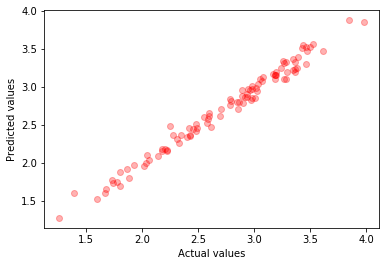

In [77]:
plt.figure()
plt.plot(y_valid, l_pr, 'ro', alpha= 0.3)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Training on complete data

In [23]:
#Training on complete data 
x_train = x_arr[ind_arr[0:500], :]
y_train = y_arr[ind_arr[0:500]]

In [24]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(8,)),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(20),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(10),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1)
])

In [25]:
# Compile the NN
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_valid, y_valid))
print("\n\n TRAINING COMPLETE! \n\n")

Train on 499 samples, validate on 99 samples
Epoch 1/100
499/499 [==============================] - 1s 1ms/sample - loss: 6.1705 - val_loss: 4.6828
Epoch 2/100
499/499 [==============================] - 0s 144us/sample - loss: 2.8747 - val_loss: 0.8758
Epoch 3/100
499/499 [==============================] - 0s 128us/sample - loss: 0.3416 - val_loss: 0.2783
Epoch 4/100
499/499 [==============================] - 0s 136us/sample - loss: 0.2327 - val_loss: 0.2127
Epoch 5/100
499/499 [==============================] - 0s 144us/sample - loss: 0.1763 - val_loss: 0.1571
Epoch 6/100
499/499 [==============================] - 0s 117us/sample - loss: 0.1254 - val_loss: 0.1099
Epoch 7/100
499/499 [==============================] - 0s 148us/sample - loss: 0.0852 - val_loss: 0.0781
Epoch 8/100
499/499 [==============================] - 0s 154us/sample - loss: 0.0597 - val_loss: 0.0557
Epoch 9/100
499/499 [==============================] - 0s 200us/sample - loss: 0.0437 - val_loss: 0.0432
Epoch 10/100

Epoch 78/100
499/499 [==============================] - 0s 113us/sample - loss: 0.0113 - val_loss: 0.0101
Epoch 79/100
499/499 [==============================] - 0s 149us/sample - loss: 0.0110 - val_loss: 0.0089
Epoch 80/100
499/499 [==============================] - 0s 129us/sample - loss: 0.0103 - val_loss: 0.0099
Epoch 81/100
499/499 [==============================] - 0s 121us/sample - loss: 0.0107 - val_loss: 0.0090
Epoch 82/100
499/499 [==============================] - 0s 127us/sample - loss: 0.0107 - val_loss: 0.0091
Epoch 83/100
499/499 [==============================] - 0s 105us/sample - loss: 0.0108 - val_loss: 0.0087
Epoch 84/100
499/499 [==============================] - 0s 138us/sample - loss: 0.0102 - val_loss: 0.0102
Epoch 85/100
499/499 [==============================] - 0s 112us/sample - loss: 0.0106 - val_loss: 0.0088
Epoch 86/100
499/499 [==============================] - 0s 120us/sample - loss: 0.0104 - val_loss: 0.0089
Epoch 87/100
499/499 [========================

## Predictions on intern_data.csv

In [27]:
#Reading test data
test_data = pd.read_csv("intern_test.csv")
values = test_data.values

### Categorical Variables

In [28]:
# Convert values in the column c to float
c_vals = values[:, 3]
c_vals_float = np.ones(c_vals.shape[0], dtype=np.float32)
c_vals_float[c_vals == 'blue'] = 0.1
c_vals_float[c_vals == 'red'] = 0.4
c_vals_float[c_vals == 'yellow'] = 0.7
c_vals_float[c_vals == 'green'] = 0.95

# Convert values in the column h to float
h_vals = values[:, 8]
h_vals_float = np.ones(h_vals.shape[0], dtype=np.float32)
h_vals_float[h_vals == 'black'] = 0


In [29]:
test_x_arr = np.zeros((values.shape[0], 8), dtype=np.float32)
test_x_arr[:, 0:2] = values[:, 1:3]
test_x_arr[:, 2] = c_vals_float
test_x_arr[:, 3:7] = values[:, 4:8]
test_x_arr[:, 7] = h_vals_float

### Predict the NN

In [30]:
test_predictions = model.predict(test_x_arr)

In [31]:
test_predictions

array([[1.873749 ],
       [3.290554 ],
       [2.5068393],
       ...,
       [2.3977637],
       [2.2998316],
       [1.3800714]], dtype=float32)

In [32]:
l_test_predictions=[]
for i in test_predictions:
    l_test_predictions.append(i[0])

### Dataframe with predictions

In [33]:
intern_predicted= pd.DataFrame()
intern_predicted['Index']= test_ID

In [34]:
intern_predicted['Predicted y'] =l_test_predictions

In [35]:
intern_predicted.set_index('Index', inplace= True)
intern_predicted

,Predicted y
Index,
1,1.873749
2,3.290554
3,2.506839
4,2.596297
5,3.278365
6,1.854631
8,2.578864
9,2.281055
10,2.870646


In [36]:
intern_predicted.to_csv('Intern_test_solution.csv')